In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df=pd.read_csv('LoanStats_2017Q2.csv')

In [59]:
x = df['loan_status']
x.value_counts()

Current               99850
Fully Paid             3896
In Grace Period         932
Late (31-120 days)      436
Late (16-30 days)       312
Charged Off              25
Name: loan_status, dtype: int64

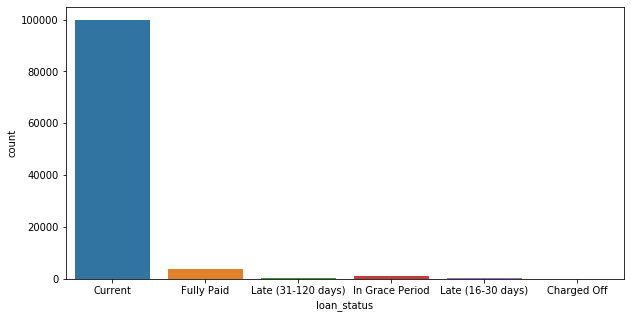

In [60]:
plt.figure(figsize=(10,5))


sns.countplot(x)



In [61]:
#filling certain columns that i think are NA due to not having a result. will sort this further down
df[['mths_since_recent_bc_dlq','mths_since_last_major_derog','mths_since_recent_revol_delinq','mths_since_last_delinq']] = df[['mths_since_recent_bc_dlq','mths_since_last_major_derog','mths_since_recent_revol_delinq','mths_since_last_delinq']].fillna(-1)


In [62]:
#setting max view and looking at dataframe
pd.set_option('display.max_columns', None)


In [63]:
#creating a mask to find percents nan over 60 percent
mask = df.columns[((df.isnull().sum()/105451)*100>=60)]
df[mask].head()

,id,member_id,url,desc,mths_since_last_record,annual_inc_joint,dti_joint,verification_status_joint,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#dropping the NaN columns over 60 percent
df.drop(mask,axis=1,inplace=True)

In [65]:
nulls = df.columns[df.isnull().any()]

df[nulls].head(5)

,emp_title,emp_length,dti,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d,mths_since_rcnt_il,il_util,all_util,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mths_since_recent_bc,mths_since_recent_inq,num_tl_120dpd_2m,percent_bc_gt_75
0,teacher,10.0,25.61,105.80%,Aug-17,Sep-17,Aug-17,26.0,69.0,94.0,26051.0,94.0,96.1,26.0,2.0,8.0,0.0,100.0
1,Registered Nurse,9.0,31.58,86.70%,Aug-17,Sep-17,Aug-17,13.0,57.0,71.0,5855.0,1421.0,94.8,118.0,21.0,13.0,0.0,100.0
2,Dealer,7.0,12.19,12.40%,Aug-17,Sep-17,Aug-17,26.0,99.0,46.0,5862.0,48443.0,12.4,153.0,33.0,22.0,0.0,60.0
3,QA Manager,1.0,31.39,98%,Aug-17,Sep-17,Aug-17,13.0,51.0,98.0,112860.0,10514.0,100.0,46.0,8.0,0.0,NaN,100.0
4,Physician Assistant,0.0,18.34,48.60%,Aug-17,Sep-17,Aug-17,10.0,58.0,56.0,21193.0,9527.0,49.6,132.0,67.0,3.0,0.0,28.6


In [66]:
#these columns represent too much work or not enough information. Emp title would be very useful but would take a long time to process.
#may come back for this one. 
df.drop(['emp_title','last_credit_pull_d','mths_since_recent_bc','mths_since_recent_inq','num_tl_120dpd_2m','percent_bc_gt_75',
         'mo_sin_old_il_acct','mths_since_rcnt_il','out_prncp_inv', 'total_pymnt_inv','last_pymnt_amnt'],inplace=True,axis=1)

In [67]:
#I'm assuming that for all people who do not have an employee length that they are unemployed.
df['emp_length'].fillna(value=-1,inplace=True)


# i am sorting by arbitrary employment lengths
def clean_up(x):
    if x < 0:
        return 0
    elif x <=1:
        return 1
    elif x<=5:
        return 2
    else:
        return 3
    
# this function returns 0 for unemployed, 1 for 0-1 years 2 for 1-5 and 5+ years employment.

df['emp_length'] = df['emp_length'].apply(lambda x: clean_up(x)).astype('category')


In [68]:
df[['mths_since_last_delinq','mths_since_last_major_derog','mths_since_recent_revol_delinq','mths_since_recent_bc_dlq']].describe()

,mths_since_last_delinq,mths_since_last_major_derog,mths_since_recent_revol_delinq,mths_since_recent_bc_dlq
count,105451.000000,105451.000000,105451.000000,105451.000000
mean,16.665399,11.539834,11.307536,8.184474
std,23.262313,23.473435,21.277866,19.685323
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000
50%,3.000000,-1.000000,-1.000000,-1.000000
75%,31.000000,14.000000,18.000000,-1.000000
max,161.000000,161.000000,161.000000,161.000000


In [69]:
# I am assuming the NaN's in this column are representitive of not having delinq.
# before filling, the mean was roughly 35 for all columns so i have split the results around 35. 
def clean_up_2(x):
    if x <0:
        return 0
    
    elif x<35:
        return 2
    else:
        return 1
change_list = ['mths_since_last_delinq','mths_since_last_major_derog','mths_since_recent_revol_delinq','mths_since_recent_bc_dlq']

for col in change_list:
    df[col] = df[col].apply(lambda x: clean_up_2(x)).astype('category')

In [70]:


def clean_3(x):
    if x is np.NaN:
        return 0
    else:
        return 1


cln_list = ['last_pymnt_d','next_pymnt_d']

for col in cln_list:
    df[col] = df[col].apply(lambda x: clean_3(x))

In [71]:
df['recovery'] = np.where((df.recoveries != 0.00), 1, 0)

In [72]:
#dropping some more useless lines
df.drop(['issue_d','title','zip_code','earliest_cr_line','addr_state',
         'pymnt_plan','policy_code','collection_recovery_fee','recoveries'],inplace=True,axis=1)

In [73]:

df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,loan_status,recovery
0,16000,16000,16000,60,1262.00%,360.95,C,C1,3,MORTGAGE,94000.0,Not Verified,debt_consolidation,25.61,0,0,0,9,0,33752,105.80%,26,w,15612.60,616.29,387.40,228.89,0.0,1,1,0,0,INDIVIDUAL,0,0,234457,2,1,0,0,11078,69.0,3,5,1962,94.0,31900,0,6,1,5,26051.0,94.0,96.1,0,0,300,2,2,7,0,0,0,2,7,2,8,1,7,18,7,9,0,0,3,100.0,0,0,319900,44830,2400,16000,N,Current,0
1,8000,8000,8000,36,1408.00%,273.74,C,C3,3,RENT,120000.0,Verified,vacation,31.58,0,0,0,16,0,36658,86.70%,28,w,7820.13,258.10,179.87,78.23,0.0,1,1,0,0,INDIVIDUAL,0,0,87827,0,5,0,2,51169,57.0,0,2,6536,71.0,42300,1,0,0,4,5855.0,1421.0,94.8,0,0,127,21,13,0,0,0,0,6,10,6,6,14,11,14,10,16,0,0,0,100.0,0,0,133955,87827,27300,91655,N,Current,0
2,26000,26000,26000,36,993.00%,838.10,B,B2,3,OWN,57900.0,Not Verified,home_improvement,12.19,0,0,0,7,1,6857,12.40%,10,w,25377.05,802.24,622.95,179.29,0.0,1,1,0,0,INDIVIDUAL,0,0,41031,0,2,0,0,34174,99.0,0,0,3037,46.0,55300,1,0,0,0,5862.0,48443.0,12.4,0,0,227,33,26,0,0,0,0,3,3,5,5,5,5,5,3,7,0,0,0,100.0,0,1,89700,41031,55300,34400,N,Current,0
3,18950,18950,18950,60,2145.00%,517.47,D,D5,1,MORTGAGE,130000.0,Verified,credit_card,31.39,0,2,1,12,0,329271,98%,17,w,18771.26,461.01,178.74,282.27,0.0,1,1,0,2,INDIVIDUAL,0,0,1354320,0,2,0,1,20653,51.0,1,2,18873,98.0,334660,0,0,3,3,112860.0,10514.0,100.0,0,0,423,8,8,2,0,2,1,7,9,12,12,2,9,14,10,12,0,0,1,88.0,0,0,1401945,109236,73600,40664,N,Current,0
4,9600,9600,9600,36,797.00%,300.70,A,A5,1,OWN,140000.0,Not Verified,credit_card,18.34,0,0,1,16,0,11808,48.60%,44,w,9363.06,290.07,236.94,53.13,0.0,1,1,0,0,INDIVIDUAL,0,814,339082,0,5,2,3,267087,58.0,0,0,6454,56.0,24300,1,3,3,3,21193.0,9527.0,49.6,0,0,135,36,10,3,1,1,0,4,6,7,9,29,10,12,6,16,0,0,2,93.2,0,0,391409,278895,18900,297759,N,Current,0
5,2000,2000,2000,36,707.00%,61.82,A,A2,2,RENT,80000.0,Not Verified,medical,12.15,0,1,0,9,0,38,0.30%,12,w,1949.96,59.86,50.04,9.82,0.0,1,1,0,0,INDIVIDUAL,0,0,17761,1,4,2,4,17723,60.0,0,1,30,40.0,15200,2,1,2,5,1973.0,14962.0,0.3,0,0,139,16,1,0,0,0,0,2,2,4,5,6,5,6,2,9,0,0,2,100.0,0,0,44660,17761,15000,29460,N,Current,0
6,15000,15000,15000,36,797.00%,469.84,A,A5,2,MORTGAGE,102000.0,Not Verified,debt_consolidation,11.20,0,0,0,14,0,14460,28.90%,26,w,14629.78,453.24,370.22,83.02,0.0,1,1,0,0,INDIVIDUAL,0,0,279860,0,3,0,1,37494,95.0,1,4,9727,58.0,50000,0,1,1,6,19990.0,35540.0,28.9,0,0,97,8,8,2,0,0,0,3,3,10,11,9,10,13,3,14,0,0,1,100.0,0,0,327003,51954,50000,39620,N,Current,0
7,2400,2400,2400,36,1199.00%,79.71,B,B5,2,RENT,62420.0,Not Verified,vacation,16.19,1,0,2,16,0,8930,66.60%,35,w,2344.27,75.71,55.73,19.98,0.0,1,1,0,0,INDIVIDUAL,0,0,64426,1,10,0,1,55496,94.0,1,2,3920,89.0,13400,0,4,1,3,4027.0,97.0,98.4,0,0,115,0,0,0,0,2,0,2,4,2,3,22,6,12,4,16,0,0,1,88.2,0,0,72412,64426,6100,59012,N,Current,0
8,10000,10000,10000,36,721.00%,309.74,A,A3,3,OWN,145000.0,Not Verified,

In [74]:
import re


def sub(text):
    text=str(text)
    x=re.sub(r'%?','',text)
    return x



df['int_rate']= df['int_rate'].apply(lambda x: sub(x))

df['int_rate']=df['int_rate'].astype('float')

df['int_rate']=df['int_rate']/100

df['revol_util']= df['revol_util'].apply(lambda x: sub(x))

df['revol_util']=df['revol_util'].astype('float')


In [75]:
nulls = df.columns[df.isnull().any()]

df[nulls].isnull().sum()


dti                  75
revol_util           75
il_util           13380
all_util             13
avg_cur_bal           2
bc_open_to_buy     1143
bc_util            1191
dtype: int64

In [81]:
nulls = df.columns[df.isnull().any()]

df[nulls].isnull().sum()



Series([], dtype: float64)

In [77]:
from keras.utils import to_categorical

In [78]:
# filling all values with 0 at the moment
df[nulls]=df[nulls].fillna(df[nulls].mean())

In [79]:
y = df['loan_status']

X=df.drop('loan_status',axis=1)



X=pd.get_dummies(X)



In [80]:
X.shape

(105451, 156)

In [24]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,recall_score,precision_score


X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=1)



In [25]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [26]:
rus = RandomUnderSampler()
ros = RandomOverSampler()

#sampling_strategy={'Current':2000,} 
X_train,y_train=rus.fit_sample(X_train,y_train)
#X_train,y_train = ros.fit_sample(X_train,y_train)

In [27]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,stratify=y_train,test_size=0.2)


In [28]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,Flatten,Dropout,MaxPool2D,BatchNormalization
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [29]:
model = Sequential()

model.add(Dense(2000,activation='relu',input_dim=159))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1000,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [30]:
from keras.optimizers import Adam

In [31]:
BS = 64
EPOCH=5

In [32]:
adam=Adam()

model.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adam')

In [33]:
y_train=pd.get_dummies(y_train)

In [34]:
y_val=pd.get_dummies(y_val)

In [38]:
checkpoint=ModelCheckpoint('weights.{epoch:02d}-{val_categorical_accuracy:.2f}.hdf5',monitor='val_categorical_accuracy',
                           verbose=1,save_best_only=True)

early_stop=EarlyStopping(monitor='val_categorical_accuracy', min_delta=0, patience=4, verbose=0,
                         mode='auto', baseline=None, restore_best_weights=False)

#class_weight = {1:0.01,
 #              0:0.29,
     ##          4:0.2,
      #         5:0.2,
        #       3:0.2,
         #      2:0.1}
#,class_weight=class_weight            

model.fit(X_train,y_train,verbose=2,epochs=EPOCH,batch_size=BS,validation_data=[X_val,y_val],
          callbacks=[early_stop,checkpoint])

Train on 11584 samples, validate on 2897 samples
Epoch 1/5
 - 70s - loss: 0.0407 - categorical_accuracy: 0.3815 - val_loss: 1.1330 - val_categorical_accuracy: 0.3949

Epoch 00001: val_categorical_accuracy improved from -inf to 0.39489, saving model to weights.01-0.39.hdf5
Epoch 2/5
 - 65s - loss: 0.0367 - categorical_accuracy: 0.4227 - val_loss: 0.8902 - val_categorical_accuracy: 0.7522

Epoch 00002: val_categorical_accuracy improved from 0.39489 to 0.75216, saving model to weights.02-0.75.hdf5
Epoch 3/5
 - 60s - loss: 0.0343 - categorical_accuracy: 0.4438 - val_loss: 1.3482 - val_categorical_accuracy: 0.6258

Epoch 00003: val_categorical_accuracy did not improve from 0.75216
Epoch 4/5
 - 67s - loss: 0.0350 - categorical_accuracy: 0.4240 - val_loss: 1.1600 - val_categorical_accuracy: 0.3835

Epoch 00004: val_categorical_accuracy did not improve from 0.75216
Epoch 5/5
 - 69s - loss: 0.0340 - categorical_accuracy: 0.4394 - val_loss: 1.3773 - val_categorical_accuracy: 0.4802

Epoch 00005:

In [36]:
preds_train=model.predict(X_test)

In [ ]:
y_test=pd.get_dummies(y_test)

In [ ]:


confusion_matrix(y_test.values.argmax(axis=1),preds_train.argmax(axis=1))

In [ ]:

f1_score(y_test,preds,average='macro', labels=labels)

In [332]:
recall_score(y_test.values.argmax(axis=1),preds_train.argmax(axis=1),average=None)

array([0.        , 0.75304191, 1.        , 0.2459893 , 0.0483871 ,
       0.20689655])